# Descripción del proyecto

Este conjunto de datos incluye información biométrica y medidas asociadas con la salud de pacientes en México, proporcionando un análisis detallado de variables como sexo, edad, concentración de hemoglobina, temperatura ambiente, valores de ácido úrico, albúmina, colesterol (HDL, LDL, total), creatinina, resultado de glucosa, insulina, proteína C reactiva, triglicéridos, glucosa promedio, hemoglobina glucosilada, ferritina, folato, homocisteína, transferrina, vitamina B12, vitamina D, peso, estatura, medida de cintura, entre otros.

La columna final, "riesgo_hipertension" (hipertensión arterial), indica si el paciente está en riesgo de desarrollar hipertensión, siendo el valor "1" para aquellos en riesgo y "0" para los que no lo están. Este conjunto de datos puede ser valioso para la identificación de factores de riesgo y patrones asociados con la hipertensión arterial en la población estudiada.


## Preparación

In [67]:
# Importar las librerías necesarias
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

## Análisis

In [68]:
df_hipertension = pd.read_csv('Hipertension_Arterial_Mexico.csv')

In [69]:
df_hipertension.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4363 entries, 0 to 4362
Data columns (total 36 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   FOLIO_I                           4363 non-null   object 
 1   sexo                              4363 non-null   int64  
 2   edad                              4363 non-null   int64  
 3   concentracion_hemoglobina         4363 non-null   float64
 4   temperatura_ambiente              4363 non-null   int64  
 5   valor_acido_urico                 4363 non-null   float64
 6   valor_albumina                    4363 non-null   float64
 7   valor_colesterol_hdl              4363 non-null   int64  
 8   valor_colesterol_ldl              4363 non-null   float64
 9   valor_colesterol_total            4363 non-null   int64  
 10  valor_creatina                    4363 non-null   float64
 11  resultado_glucosa                 4363 non-null   float64
 12  valor_

In [70]:
display(df_hipertension.head(3))

,FOLIO_I,sexo,edad,concentracion_hemoglobina,temperatura_ambiente,valor_acido_urico,valor_albumina,valor_colesterol_hdl,valor_colesterol_ldl,valor_colesterol_total,...,segundamedicion_peso,segundamedicion_estatura,distancia_rodilla_talon,circunferencia_de_la_pantorrilla,segundamedicion_cintura,tension_arterial,sueno_horas,masa_corporal,actividad_total,riesgo_hipertension
0,2022_01001004,2,41,14.2,22,4.8,4.0,34,86.0,139,...,64.70,154.0,48.5,33.5,0.0,107,4,32.889389,120,1
1,2022_01001009,2,65,14.1,9,4.4,3.8,73,130.0,252,...,96.75,152.2,44.5,41.1,113.7,104,2,1.000000,240,0
2,2022_01001012,2,68,14.2,22,4.8,4.0,34,86.0,139,...,68.70,144.8,42.3,37.8,103.7,105,1,1.000000,480,0


In [71]:
print(df_hipertension.shape)

(4363, 36)


In [72]:
df_hipertension.duplicated().sum()

0

In [73]:
df_hipertension.isna().sum()

FOLIO_I                             0
sexo                                0
edad                                0
concentracion_hemoglobina           0
temperatura_ambiente                0
valor_acido_urico                   0
valor_albumina                      0
valor_colesterol_hdl                0
valor_colesterol_ldl                0
valor_colesterol_total              0
valor_creatina                      0
resultado_glucosa                   0
valor_insulina                      0
valor_trigliceridos                 0
resultado_glucosa_promedio          0
valor_hemoglobina_glucosilada       0
valor_ferritina                     0
valor_folato                        0
valor_homocisteina                  0
valor_proteinac_reactiva            0
valor_transferrina                  0
valor_vitamina_bdoce                0
valor_vitamina_d                    0
peso                                0
estatura                            0
medida_cintura                      0
segundamedic

In [74]:
display(df_hipertension.describe())

,sexo,edad,concentracion_hemoglobina,temperatura_ambiente,valor_acido_urico,valor_albumina,valor_colesterol_hdl,valor_colesterol_ldl,valor_colesterol_total,valor_creatina,...,segundamedicion_peso,segundamedicion_estatura,distancia_rodilla_talon,circunferencia_de_la_pantorrilla,segundamedicion_cintura,tension_arterial,sueno_horas,masa_corporal,actividad_total,riesgo_hipertension
count,4363.000000,4363.000000,4363.000000,4363.000000,4363.000000,4363.000000,4363.000000,4363.000000,4363.000000,4363.000000,...,4363.000000,4363.000000,4363.000000,4363.000000,4363.000000,4363.000000,4363.000000,4363.000000,4363.000000,4363.000000
mean,1.613339,47.315609,14.228581,21.385973,4.787302,3.868966,36.030254,87.809489,144.138895,0.614573,...,65.789817,153.819940,48.456910,34.061242,19.986340,123.732065,3.239972,22.451292,481.815265,0.645427
std,0.487041,14.445572,1.149723,3.165974,0.820317,0.450879,8.082762,17.530104,28.228483,0.200610,...,7.447041,7.854184,3.488546,4.029785,40.442427,22.608401,2.778287,12.314372,673.702857,0.478438
min,1.000000,4.000000,5.500000,2.000000,0.200000,1.000000,9.000000,11.100000,40.000000,0.060000,...,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,10.000000,0.000000
25%,1.000000,36.000000,14.200000,22.000000,4.800000,4.000000,34.000000,86.000000,139.000000,0.580000,...,64.700000,154.000000,48.500000,33.500000,0.000000,111.000000,2.000000,19.619493,240.000000,0.000000
50%,2.000000,48.000000,14.200000,22.000000,4.800000,4.000000,34.000000,86.000000,139.000000,0.580000,...,64.700000,154.000000,48.500000,33.500000,0.000000,121.000000,3.000000,26.229298,380.000000,1.000000
75%,2.000000,58.000000,14.200000,22.000000,4.800000,4.000000,34.000000,86.000000,139.000000,0.580000,...,64.700000,154.000000,48.500000,33.500000,0.000000,136.000000,4.000000,30.285913,585.000000,1.000000
max,2.000000,93.000000,19.900000,35.000000,11.000000,5.300000,279.000000,303.000000,681.000000,8.270000,...,151.200000,182.600000,97.300000,105.200000,165.000000,200.000000,99.000000,60.513476,17820.000000,1.000000


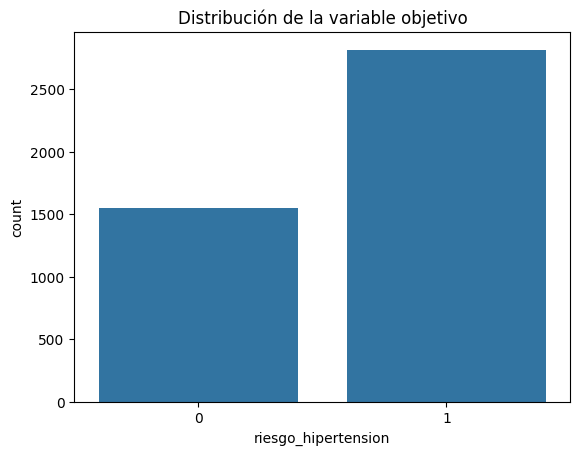

In [75]:
# Distribución de la variable objetivo
sns.countplot(data=df, x='riesgo_hipertension')
plt.title("Distribución de la variable objetivo")
plt.show()

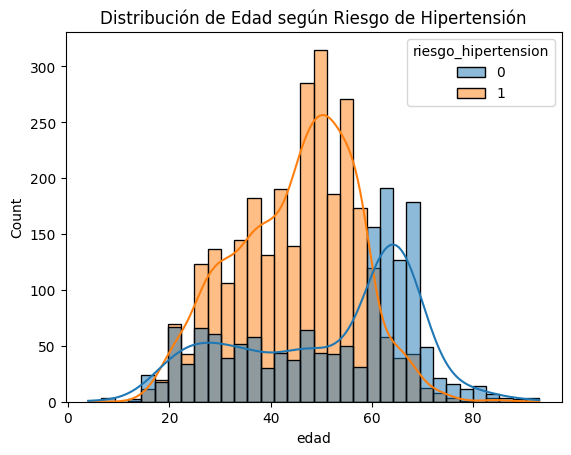

In [76]:
# Distribución de edad y otros factores de riesgo
sns.histplot(data=df, x='edad', hue='riesgo_hipertension', kde=True)
plt.title("Distribución de Edad según Riesgo de Hipertensión")
plt.show()

# Prueba

In [77]:
# Selección de variables para el modelo (excluyendo la variable objetivo y cualquier identificador)
X = df.drop(columns=['riesgo_hipertension', 'FOLIO_I'])  # Excluye 'riesgo_hipertension' y 'FOLIO_I' (identificador)
y = df['riesgo_hipertension']

In [78]:
# Escalar las variables
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [80]:
# División del dataset en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [81]:
# Modelo de regresión logística
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

In [82]:
# Modelo de bosque aleatorio
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

In [83]:
# Evaluación de modelos
print("Regresión Logística:\n", classification_report(y_test, y_pred_lr))
print("Precisión:", accuracy_score(y_test, y_pred_lr))

Regresión Logística:
               precision    recall  f1-score   support

           0       0.78      0.73      0.75       309
           1       0.86      0.88      0.87       564

    accuracy                           0.83       873
   macro avg       0.82      0.81      0.81       873
weighted avg       0.83      0.83      0.83       873

Precisión: 0.8304696449026346


In [84]:
print("\nBosque Aleatorio:\n", classification_report(y_test, y_pred_rf))
print("Precisión:", accuracy_score(y_test, y_pred_rf))


Bosque Aleatorio:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97       309
           1       0.99      0.98      0.98       564

    accuracy                           0.98       873
   macro avg       0.98      0.98      0.98       873
weighted avg       0.98      0.98      0.98       873

Precisión: 0.979381443298969


# Conclusion

Para predecir el riesgo de hipertensión en pacientes, se probaron dos modelos de machine learning: Regresión Logística y Bosque Aleatorio. Ambos modelos lograron buenos niveles de precisión, pero el Bosque Aleatorio mostró un desempeño superior con una precisión del 98% en comparación con el 83% de la Regresión Logística. Esto sugiere que el Bosque Aleatorio es mejor en la identificación precisa de pacientes en riesgo y aquellos sin riesgo de hipertensión, manteniendo un equilibrio sólido entre las clases.

El alto rendimiento del Bosque Aleatorio indica que es una herramienta confiable para apoyar en la toma de decisiones médicas, ayudando a los profesionales de la salud a identificar de manera eficaz a pacientes que pueden requerir intervenciones preventivas para reducir su riesgo de desarrollar hipertensión. Con ajustes adicionales a los parámetros del modelo o la prueba de otros algoritmos avanzados como XGBoost o LightGBM, podría ser posible mejorar aún más estos resultados.